In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
df = pd.read_csv(r"C:\Users\ndhaddha1\Documents\Important Files\iXperience\compas-scores-raw.csv")
df.head()

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0


In [86]:
df.columns

Index(['Person_ID', 'LastName', 'FirstName', 'Sex', 'Ethnicity', 'DateOfBirth',
       'ScaleSet', 'AssessmentReason', 'Language', 'LegalStatus',
       'CustodyStatus', 'MaritalStatus', 'RecSupervisionLevel',
       'RecSupervisionLevelText', 'Scale_ID', 'RecRisk', 'RawScore',
       'DecileScore', 'Score', 'AssessmentType'],
      dtype='object')

In [88]:
df.apply('nunique')

Person_ID                  18610
LastName                   10896
FirstName                   7225
Sex                            2
Ethnicity                      9
DateOfBirth                10382
ScaleSet                       2
AssessmentReason               1
Language                       2
LegalStatus                    7
CustodyStatus                  6
MaritalStatus                  7
RecSupervisionLevel            4
RecSupervisionLevelText        4
Scale_ID                       3
RecRisk                        3
RawScore                     659
DecileScore                   11
Score                          3
AssessmentType                 2
dtype: int64

In [45]:
df.shape

(60843, 28)

In [46]:
df.describe()

,Person_ID,AssessmentID,Case_ID,ScaleSet_ID,RecSupervisionLevel,Scale_ID,RawScore,DecileScore,IsCompleted,IsDeleted
count,60843.000000,60843.000000,60843.000000,60843.000000,60843.000000,60843.000000,60843.000000,60843.000000,60843.0,60843.0
mean,53683.206154,68061.029190,60209.128149,21.819536,1.630048,11.000000,5.081457,3.571701,1.0,0.0
std,14363.648515,7320.208226,9638.501654,0.932614,0.944220,4.966596,10.080518,2.617854,0.0,0.0
min,656.000000,649.000000,350.000000,17.000000,1.000000,7.000000,-4.790000,-1.000000,1.0,0.0
25%,52039.000000,62582.000000,56021.000000,22.000000,1.000000,7.000000,-2.090000,1.000000,1.0,0.0
50%,57321.000000,68229.000000,61261.000000,22.000000,1.000000,8.000000,-0.710000,3.000000,1.0,0.0
75%,62748.000000,73870.000000,66554.000000,22.000000,2.000000,18.000000,14.000000,5.000000,1.0,0.0
max,68608.000000,79678.000000,72045.000000,22.000000,4.000000,18.000000,51.000000,10.000000,1.0,0.0


In [47]:
df.head()

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0


In [48]:
df = df.drop(["AssessmentID","Case_ID","Agency_Text","MiddleName","IsCompleted","IsDeleted","ScaleSet_ID","Screening_Date"], axis=1)
df.head()

,Person_ID,LastName,FirstName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType
0,50844,Fisher,Kevin,Male,Caucasian,12/05/92,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1,Low,7,Risk of Violence,-2.08,4,Low,New
1,50844,Fisher,Kevin,Male,Caucasian,12/05/92,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1,Low,8,Risk of Recidivism,-1.06,2,Low,New
2,50844,Fisher,Kevin,Male,Caucasian,12/05/92,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New
3,50848,KENDALL,KEVIN,Male,Caucasian,09/16/84,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1,Low,7,Risk of Violence,-2.84,2,Low,New
4,50848,KENDALL,KEVIN,Male,Caucasian,09/16/84,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1,Low,8,Risk of Recidivism,-1.50,1,Low,New


In [49]:
df = df.rename(columns={
    "Sex_Code_Text":"Sex","Ethnic_Code_Text":"Ethnicity","DateofBirth":"DOB","RecSupervisionLeveltext":"RecSupervisionLevel","DisplayText":"RecRisk","ScoreText":"Score"
})
df.head()

,Person_ID,LastName,FirstName,Sex,Ethnicity,DateOfBirth,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,RecRisk,RawScore,DecileScore,Score,AssessmentType
0,50844,Fisher,Kevin,Male,Caucasian,12/05/92,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1,Low,7,Risk of Violence,-2.08,4,Low,New
1,50844,Fisher,Kevin,Male,Caucasian,12/05/92,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1,Low,8,Risk of Recidivism,-1.06,2,Low,New
2,50844,Fisher,Kevin,Male,Caucasian,12/05/92,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New
3,50848,KENDALL,KEVIN,Male,Caucasian,09/16/84,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1,Low,7,Risk of Violence,-2.84,2,Low,New
4,50848,KENDALL,KEVIN,Male,Caucasian,09/16/84,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1,Low,8,Risk of Recidivism,-1.50,1,Low,New


In [50]:
df.isna().sum()

Person_ID                   0
LastName                    0
FirstName                   0
Sex                         0
Ethnicity                   0
DateOfBirth                 0
ScaleSet                    0
AssessmentReason            0
Language                    0
LegalStatus                 0
CustodyStatus               0
MaritalStatus               0
RecSupervisionLevel         0
RecSupervisionLevelText     0
Scale_ID                    0
RecRisk                     0
RawScore                    0
DecileScore                 0
Score                      45
AssessmentType              0
dtype: int64

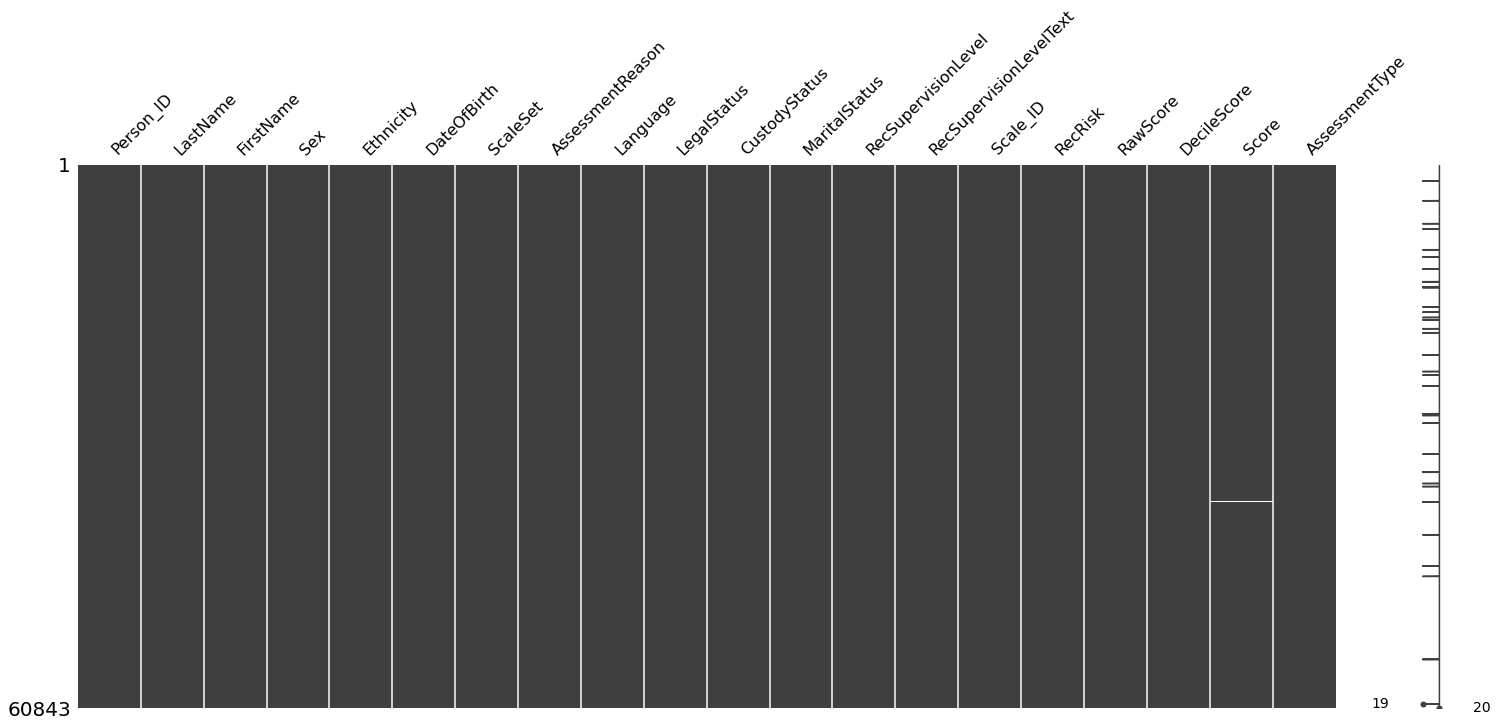

In [51]:
import missingno as msno

msno.matrix(df);

In [85]:
DecileScore_mean = df.DecileScore.mean()

df.DecileScore = df.DecileScore.fillna(DecileScore_mean)
df.head()

,Person_ID,LastName,FirstName,Sex,Ethnicity,DateOfBirth,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,RecRisk,RawScore,DecileScore,Score,AssessmentType
0,50844,Fisher,Kevin,Male,Caucasian,12/05/92,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1,Low,7,Risk of Violence,-2.08,4,Low,New
1,50844,Fisher,Kevin,Male,Caucasian,12/05/92,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1,Low,8,Risk of Recidivism,-1.06,2,Low,New
2,50844,Fisher,Kevin,Male,Caucasian,12/05/92,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New
3,50848,KENDALL,KEVIN,Male,Caucasian,09/16/84,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1,Low,7,Risk of Violence,-2.84,2,Low,New
4,50848,KENDALL,KEVIN,Male,Caucasian,09/16/84,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1,Low,8,Risk of Recidivism,-1.50,1,Low,New


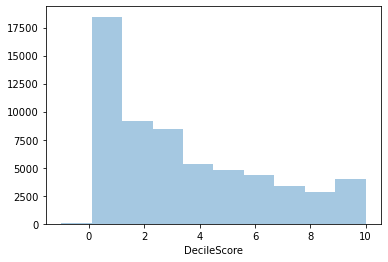

In [53]:
sns.distplot(df.DecileScore, hist=True, kde=False, bins=10)

In [84]:
numerical = ['RawScore','DecileScore',]

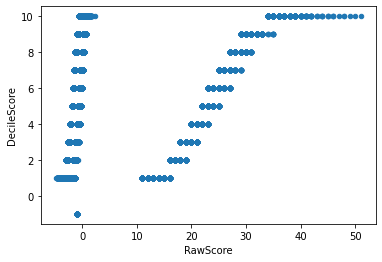

In [57]:
df[numerical].plot.scatter(x='RawScore',y='DecileScore')

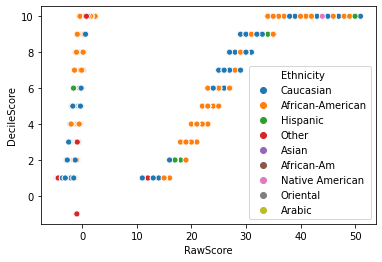

In [100]:
ax = sns.scatterplot(x="RawScore", y="DecileScore", data=df, hue="Ethnicity")


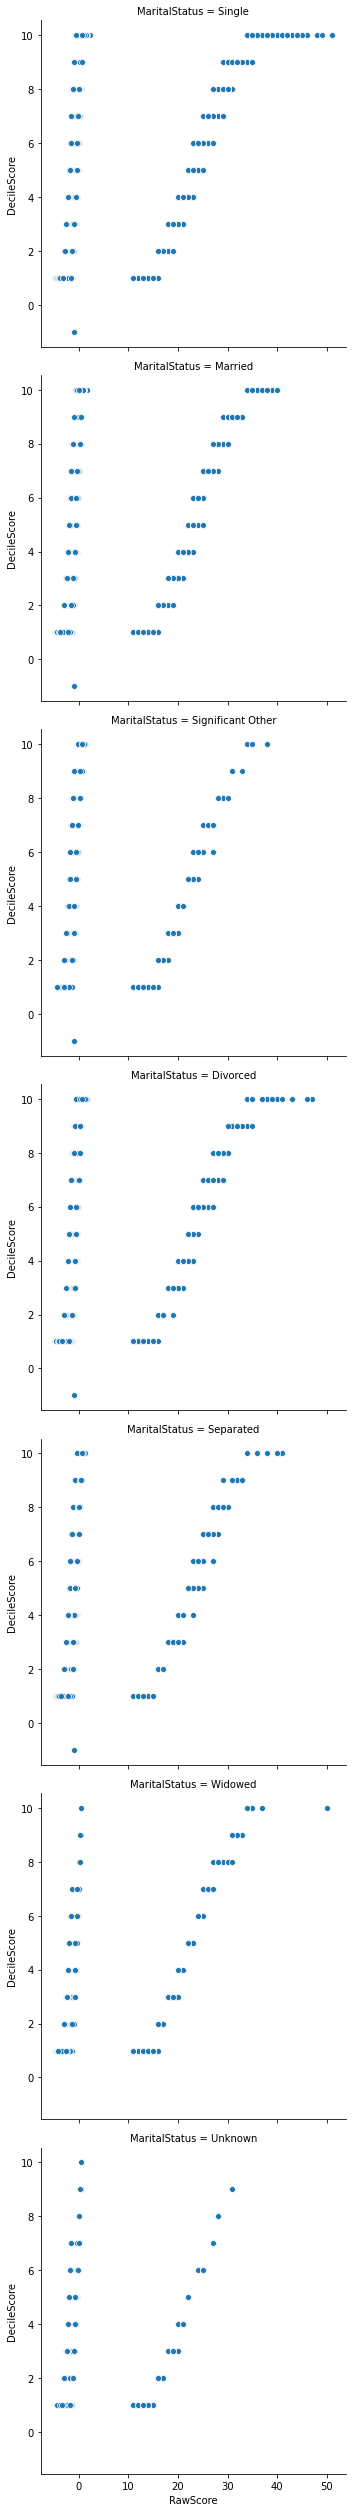

In [63]:
ax = sns.relplot(x="RawScore", y="DecileScore", data=df, row="MaritalStatus", kind = "scatter")


In [82]:
from ipywidgets import interact, fixed

In [81]:
def numerical_variable_distribution(df, col):
    df[col].plot.hist()

In [80]:
def categorical_variable_distribution(col):
    df[col].value_counts(ascending=True,normalize=True).tail(20).plot.barh() # only pulls out 20 results.

In [68]:
categorical_columns = df.select_dtypes(
    ['object', 'category']).columns.tolist()

In [101]:
interact(categorical_variable_distribution, col=categorical_columns,hue="MaritalStatus",palette ='rainbow');

interactive(children=(Dropdown(description='col', options=('LastName', 'FirstName', 'Sex', 'Ethnicity', 'DateO…

KeyError: 'Count'

In [71]:
def pivot_count(df, rows, columns): # this just makes a function that does a pivotcount for us with different variables.
    df_pivot = df.pivot_table(values="Person_ID", # could be any column, since we are just counting rows 
                              index=rows, 
                              columns=columns, 
                              aggfunc=np.size
                             ).dropna(axis=0, how='all')
    return df_pivot

In [72]:
recidivism_score = pivot_count(df, "Ethnicity", "DecileScore")
recidivism_score

DecileScore,-1,1,2,3,4,5,6,7,8,9,10
Ethnicity,,,,,,,,,,,
African-Am,NaN,7.0,4.0,2.0,6.0,1.0,6.0,2.0,4.0,7.0,12.0
African-American,16.0,5580.0,3581.0,3726.0,2579.0,2525.0,2459.0,2015.0,1810.0,1595.0,1132.0
Arabic,NaN,26.0,14.0,7.0,11.0,4.0,6.0,2.0,1.0,2.0,2.0
Asian,NaN,171.0,50.0,35.0,22.0,13.0,11.0,8.0,10.0,2.0,2.0
Caucasian,18.0,8003.0,3506.0,3049.0,1803.0,1561.0,1273.0,922.0,720.0,586.0,342.0
Hispanic,9.0,3389.0,1548.0,1339.0,687.0,566.0,432.0,299.0,199.0,160.0,114.0
Native American,NaN,48.0,33.0,33.0,26.0,15.0,16.0,16.0,13.0,7.0,12.0
Oriental,NaN,13.0,9.0,7.0,4.0,3.0,1.0,NaN,1.0,NaN,1.0
Other,2.0,1228.0,447.0,294.0,200.0,143.0,115.0,74.0,41.0,27.0,21.0


In [90]:
df.groupby("MaritalStatus")["DecileScore"].mean()

MaritalStatus
Divorced             2.471513
Married              2.282061
Separated            2.791459
Significant Other    3.292857
Single               3.948965
Unknown              2.680751
Widowed              2.879487
Name: DecileScore, dtype: float64

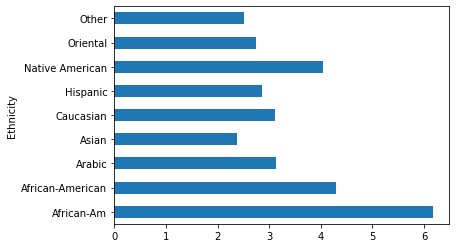

In [74]:
df.groupby("Ethnicity")["DecileScore"].mean().plot.barh() 

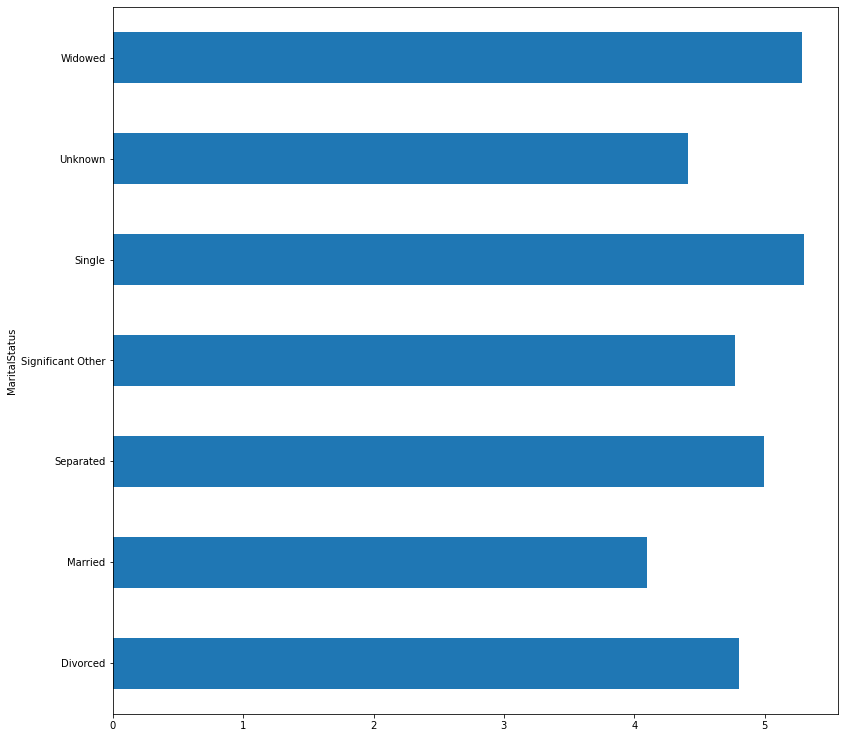

In [75]:
plt.figure(figsize=(13,13)) #We're just going to set a large figure size (we can also do this with sns)
df.groupby("MaritalStatus")["RawScore"].mean().plot.barh()

In [76]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

categorical_variables = df.select_dtypes(
    ['object', 'category']).columns.tolist()

numerical_variables = df.select_dtypes(include=np.number) # different way of doing the above. 
#There is almnost always more than 1 way to skin a code

def means_by_category(col_group, col_calc):
    df.groupby(col_group)[col_calc].mean().nlargest(10).plot(kind='barh', figsize=(10,10))
    sns.mpl.pyplot.xlabel('Mean values for variable {}'.format(col_calc))

interact(means_by_category, col_group=categorical_variables, col_calc=numerical_variables);

interactive(children=(Dropdown(description='col_group', options=('LastName', 'FirstName', 'Sex', 'Ethnicity', …

In [79]:
len(df.DecileScore.unique())

11